In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys
sys.path.append('../Spectra_cleaning/lib')
from simulations import create_noise_with_desired_psd, G_Maxwell

In [2]:

def Chi(omega,A,B):
    return np.where(omega == 0, 0,1/G_Maxwell(omega,A,B))
def G_Maxwell(omega, A, B):
    return 1/(A /((1j * omega)) + B)
def PSD(omega,A,B):
    return -2/omega *np.imag(Chi(omega,A,B))
def generate_noise_PSD(omega,A,B):
    return np.where(omega == 0, 0,PSD(omega,A,B)/np.abs(G_Maxwell(omega,A,B))**2)
    

In [3]:
omega = np.logspace(-2, 2, 1000)
A = 1
B = 10
G = G_Maxwell(omega, A, B)
X = Chi(omega, A, B)
S = PSD(omega, A, B)
N = generate_noise_PSD(omega, A, B)

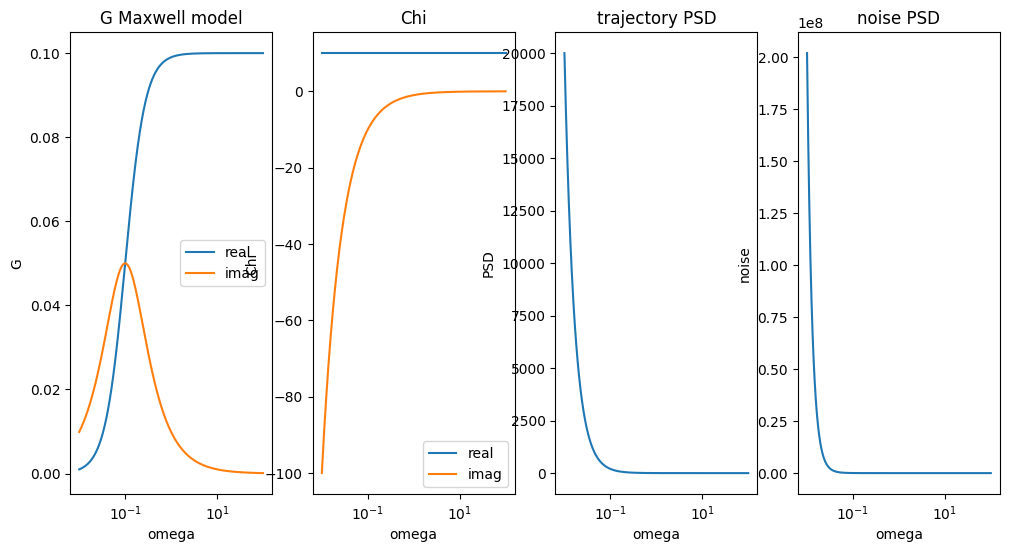

<Figure size 640x480 with 0 Axes>

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 6))

# Plot for G
ax1.set_title('G Maxwell model')
ax1.plot(omega, np.real(G), label='real')
ax1.plot(omega, np.imag(G), label='imag')
ax1.set_xscale('log')
ax1.legend()
ax1.set_xlabel('omega')
ax1.set_ylabel('G')

# Plot for Chi
ax2.set_title('Chi')
ax2.plot(omega, np.real(X), label='real')
ax2.plot(omega, np.imag(X), label='imag')
ax2.set_xscale('log')
ax2.legend()
ax2.set_xlabel('omega')
ax2.set_ylabel('Chi')


# Plot for PSD
ax3.set_title('trajectory PSD')
ax3.plot(omega, S)
ax3.set_xscale('log')
ax3.set_xlabel('omega')
ax3.set_ylabel('PSD')

# Plot for noise
ax4.set_title('noise PSD')
ax4.plot(omega, N)
ax4.set_xscale('log')
ax4.set_xlabel('omega')
ax4.set_ylabel('noise')




plt.show()

plt.tight_layout()
plt.show()

In [7]:
nu = 1
E = 1

A = 1/nu
B = 1/E
noise_time, noise_rajectory = create_noise_with_desired_psd(lambda w: generate_noise_PSD(w,A,B), 100000000,10000)
frequencies = np.fft.fftfreq(len(noise_time), noise_time[1]-noise_time[0])
noise_spectrum = np.fft.fft(noise_rajectory)
Chi_spectrum = Chi(frequencies,A,B)

trajectory = np.fft.ifft(noise_spectrum*Chi_spectrum)

C:\Users\jschulz\AppData\Local\Temp\ipykernel_11404\2374418035.py:6: RuntimeWarning: divide by zero encountered in divide
  return -2/omega *np.imag(Chi(omega,A,B))
C:\Users\jschulz\AppData\Local\Temp\ipykernel_11404\2374418035.py:4: RuntimeWarning: divide by zero encountered in divide
  return 1/(A /((1j * omega)) + B)
C:\Users\jschulz\AppData\Local\Temp\ipykernel_11404\2374418035.py:4: RuntimeWarning: invalid value encountered in divide
  return 1/(A /((1j * omega)) + B)
C:\Users\jschulz\AppData\Local\Temp\ipykernel_11404\2374418035.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(omega == 0, 0,1/G_Maxwell(omega,A,B))
C:\Users\jschulz\AppData\Local\Temp\ipykernel_11404\2374418035.py:6: RuntimeWarning: invalid value encountered in multiply
  return -2/omega *np.imag(Chi(omega,A,B))


In [8]:
plt.plot(noise_time,trajectory)

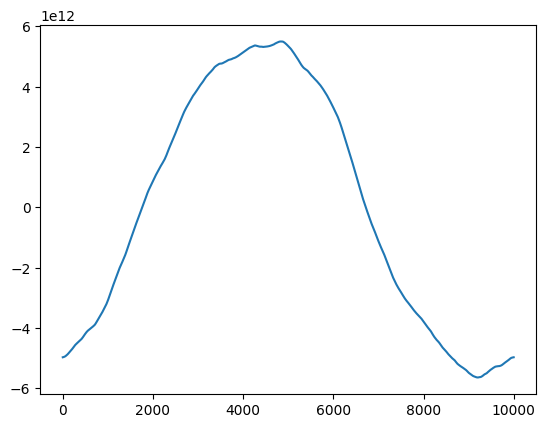

In [9]:
plt.plot(noise_rajectory)

In [4]:
noise = create_noise_with_desired_psd(1000, 1000, 1, 1, 1, 1, 1, 1, 1, 1)

TypeError: create_noise_with_desired_psd() takes 3 positional arguments but 10 were given

In [30]:
noise= np.random.normal(0,1,1000)
fourier_noise = np.fft.fft(noise)
freq = np.fft.fftfreq(len(noise), 1/1000)
def phase_function(omega):
    return np.arctan2(-omega,1)
phase = phase_function(freq)
multipyer = np.exp(1j*phase)
fourier_noise = fourier_noise*multipyer
changed_noise = np.fft.ifft(fourier_noise)

C:\Users\jschulz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


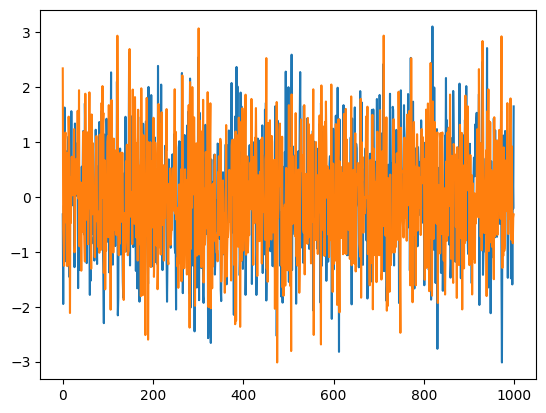

In [31]:
plt.plot(noise)
plt.plot(changed_noise)
plt.show()